Імпорт бібліотек та налашування для кращого відображення графіків

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set(style="whitegrid")

Завантаження та підготовка даних

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
    'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
    'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
    'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
    'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',
    'price']

df = pd.read_csv(url, header = None, names = columns, na_values = '?')

print(df.info())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN


Очищення даних

In [3]:
numeric_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height',
    'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
    'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

for col in numeric_cols :
    df[col] = pd.to_numeric(df[col])

df_cleaned = df.dropna(subset = ['price', 'horsepower', 'engine-size', 'city-mpg'])

print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          199 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               199 non-null    object 
 3   fuel-type          199 non-null    object 
 4   aspiration         199 non-null    object 
 5   num-of-doors       197 non-null    object 
 6   body-style         199 non-null    object 
 7   drive-wheels       199 non-null    object 
 8   engine-location    199 non-null    object 
 9   wheel-base         199 non-null    float64
 10  length             199 non-null    float64
 11  width              199 non-null    float64
 12  height             199 non-null    float64
 13  curb-weight        199 non-null    int64  
 14  engine-type        199 non-null    object 
 15  num-of-cylinders   199 non-null    object 
 16  engine-size        199 non-null

Графік залежності 'scatterplot' між ціною та потужністю

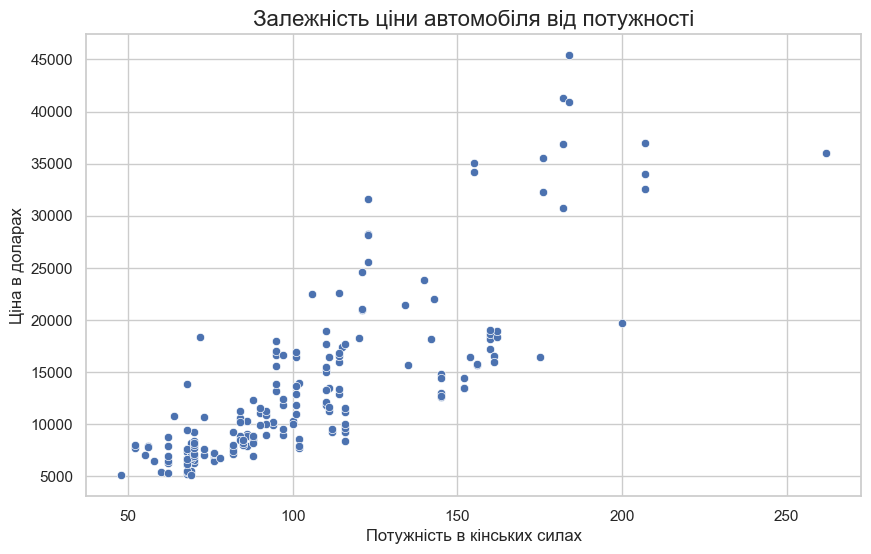

In [4]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = df_cleaned, x = 'horsepower', y = 'price')
plt.title('Залежність ціни автомобіля від потужності', fontsize = 16)
plt.xlabel('Потужність в кінських силах')
plt.ylabel('Ціна в доларах')
plt.show()

Гістограма з 5 діапазонами

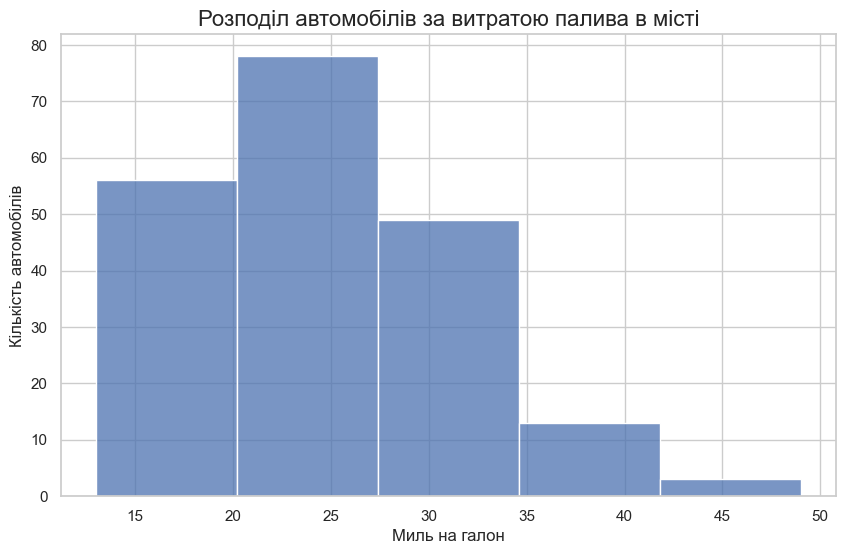

In [5]:
plt.figure(figsize = (10, 6))

sns.histplot(data = df_cleaned, x = 'city-mpg', bins = 5, kde = False)

plt.title('Розподіл автомобілів за витратою палива в місті', fontsize=16)
plt.xlabel('Миль на галон')
plt.ylabel('Кількість автомобілів')
plt.show()

Багатовимірна візуалізація

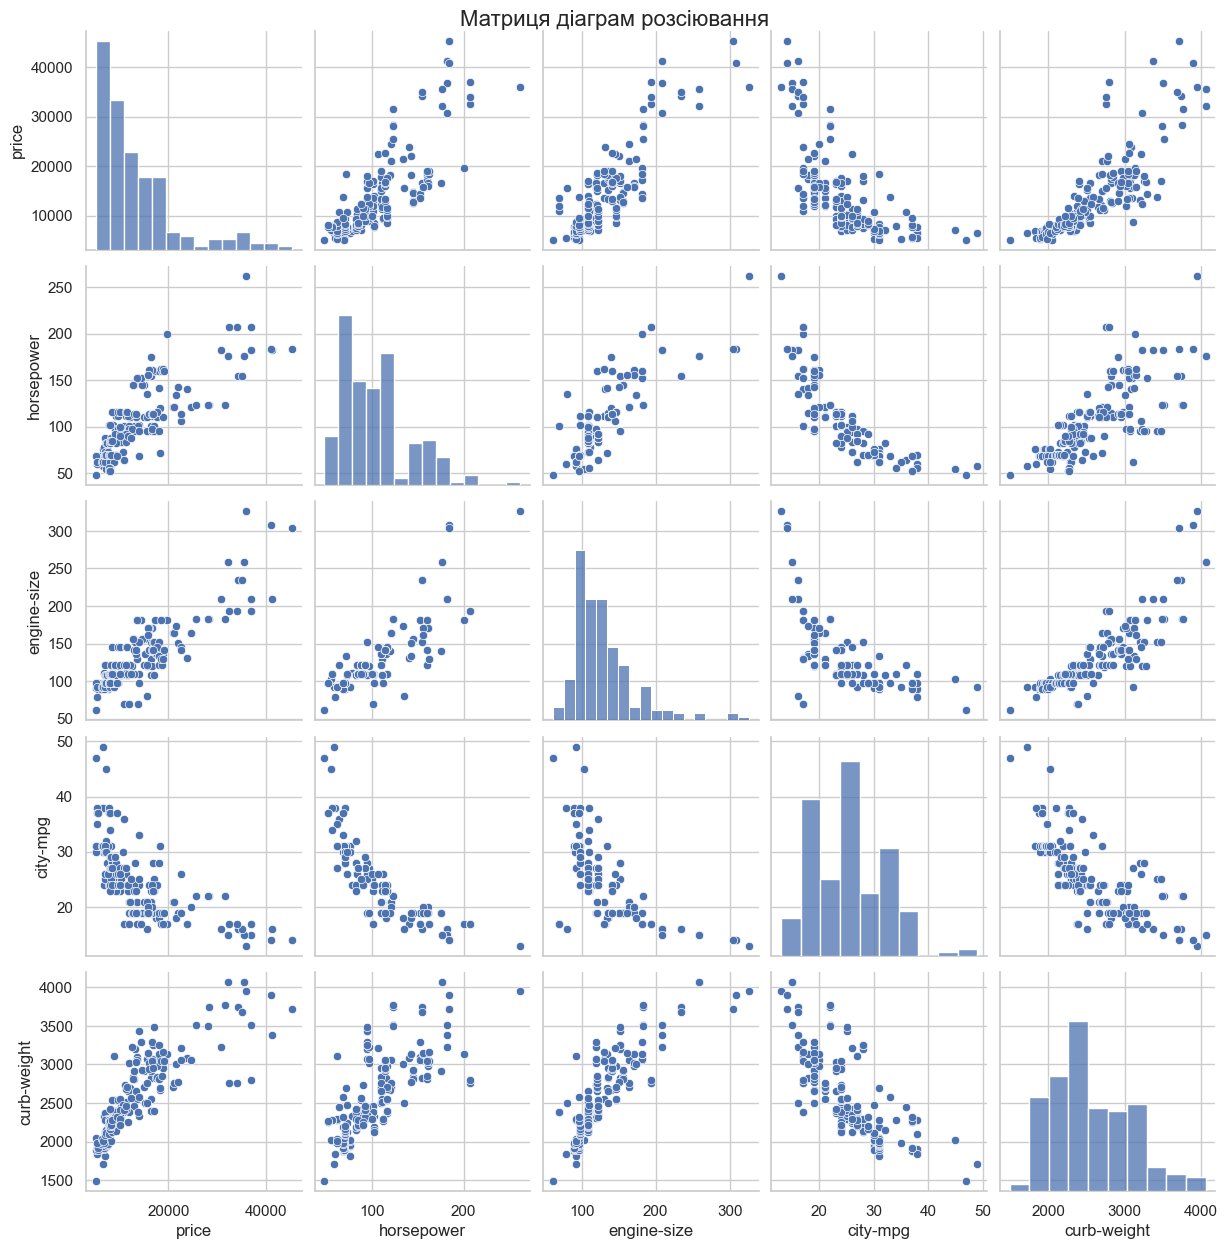

In [8]:
pairplot_cols = ['price', 'horsepower', 'engine-size', 'city-mpg', 'curb-weight']

sns.pairplot(df_cleaned[pairplot_cols])
plt.suptitle('Матриця діаграм розсіювання', y = 1, fontsize = 16)
plt.show()

Додаткові корисні графіки :

Box Plot - Порівняємо розподіл цін для різних типів кузова

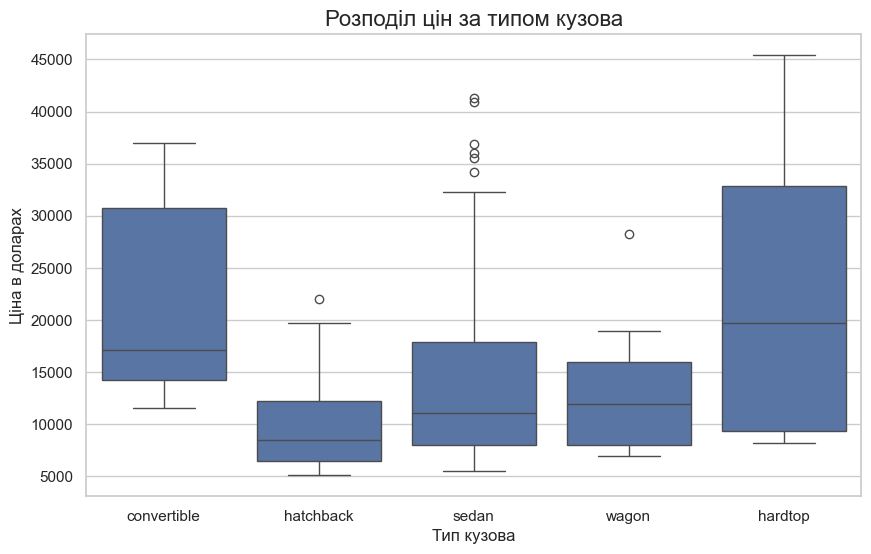

In [9]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df_cleaned, x = 'body-style', y = 'price')
plt.title('Розподіл цін за типом кузова', fontsize = 16)
plt.xlabel('Тип кузова')
plt.ylabel('Ціна в доларах')
plt.show()

Heatmap - Побудуємо теплову карту, щоб візуалізувати кореляцію між усіма числовими змінними

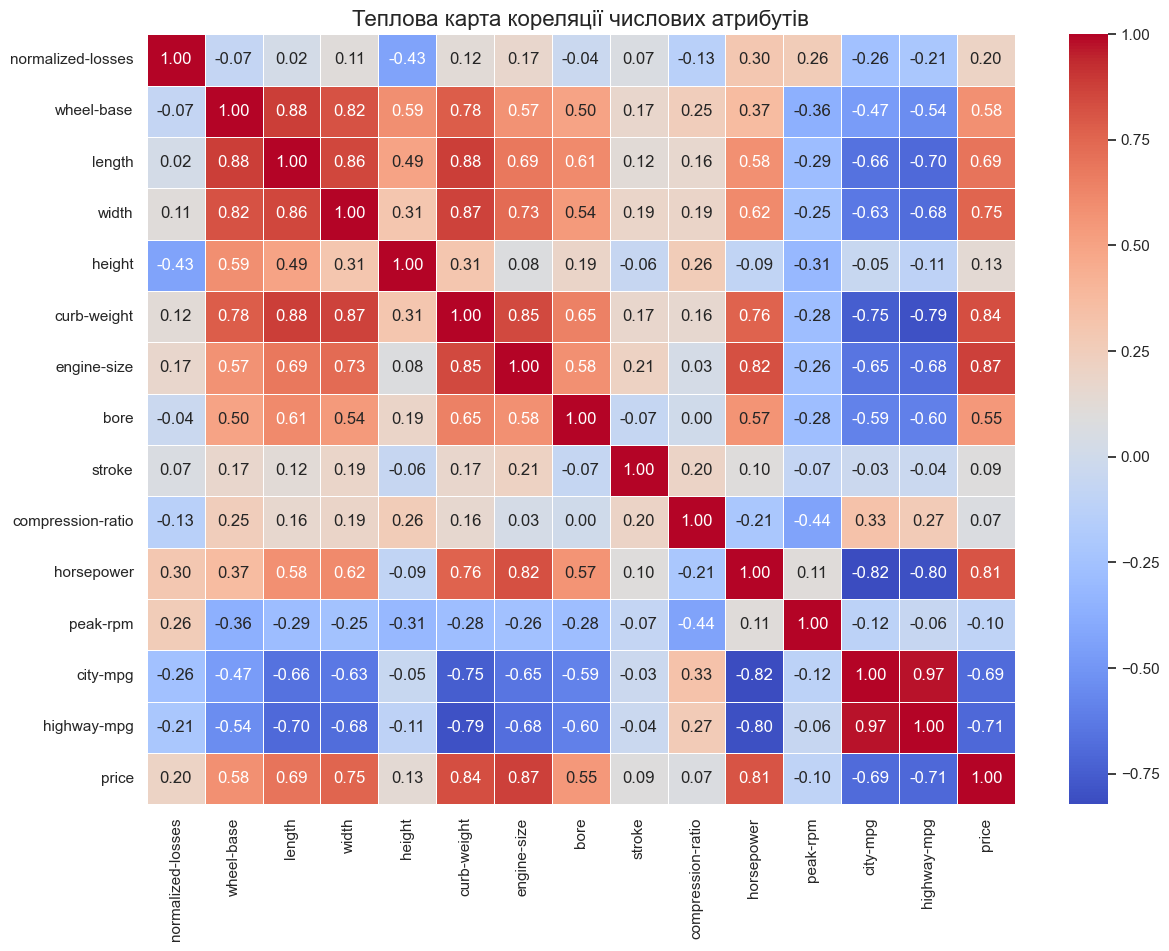

In [10]:
corr_matrix = df_cleaned[numeric_cols].corr()

plt.figure(figsize = (14, 10))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidth = .5)
plt.title('Теплова карта кореляції числових атрибутів', fontsize = 16)
plt.show()

Violon Plot - Подивимось на розподіл потужності залежно від типу палива

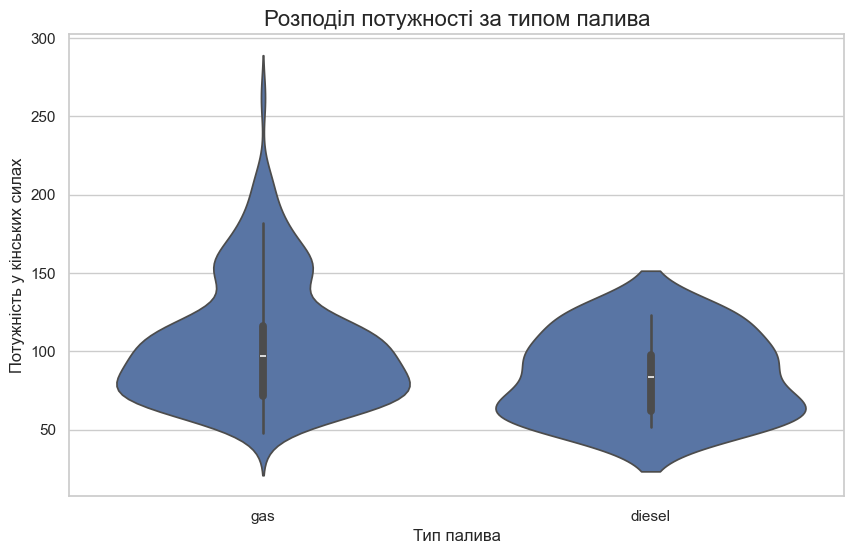

In [11]:
plt.figure(figsize = (10, 6))
sns.violinplot(data = df_cleaned, x = 'fuel-type', y = 'horsepower')
plt.title('Розподіл потужності за типом палива', fontsize = 16)
plt.xlabel('Тип палива')
plt.ylabel('Потужність у кінських силах')
plt.show()

Count Plot - Покажемо, скільки автомобілів кожного виробника представлено в нашому очищеному наборі даних

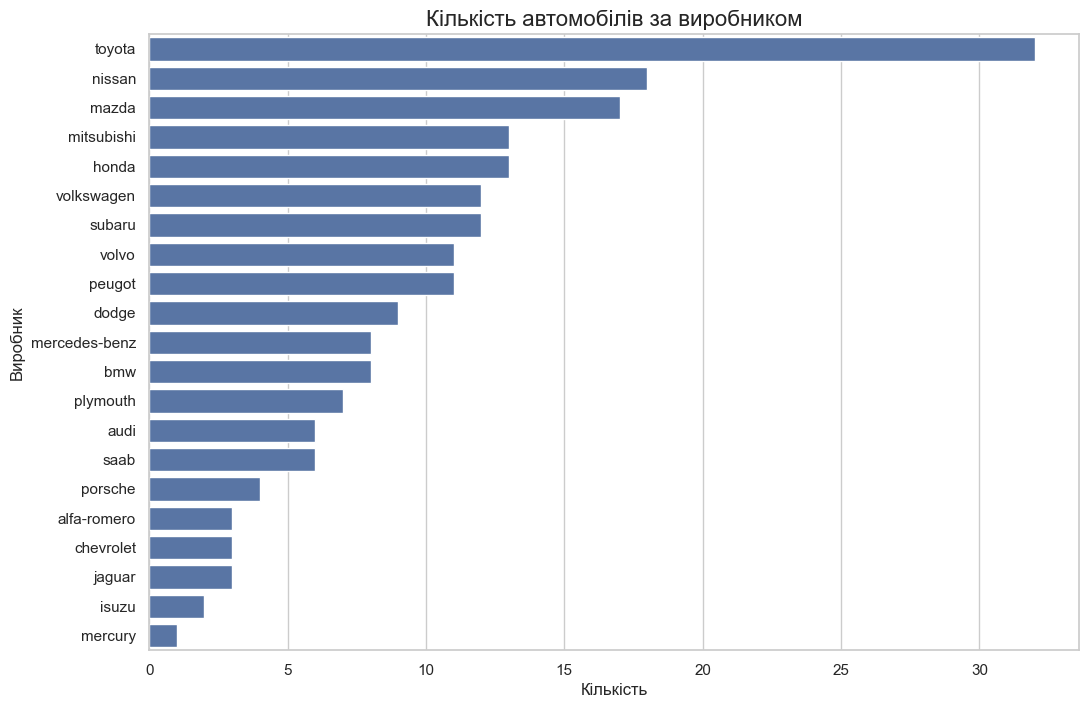

In [12]:
plt.figure(figsize = (12, 8))

sns.countplot(data = df_cleaned, y = 'make', order = df_cleaned['make'].value_counts().index)
plt.title('Кількість автомобілів за виробником', fontsize = 16)
plt.xlabel('Кількість')
plt.ylabel('Виробник')
plt.show()


Box Plot - Дослідимо, як ціна автомобіля залежить від кількості циліндрів

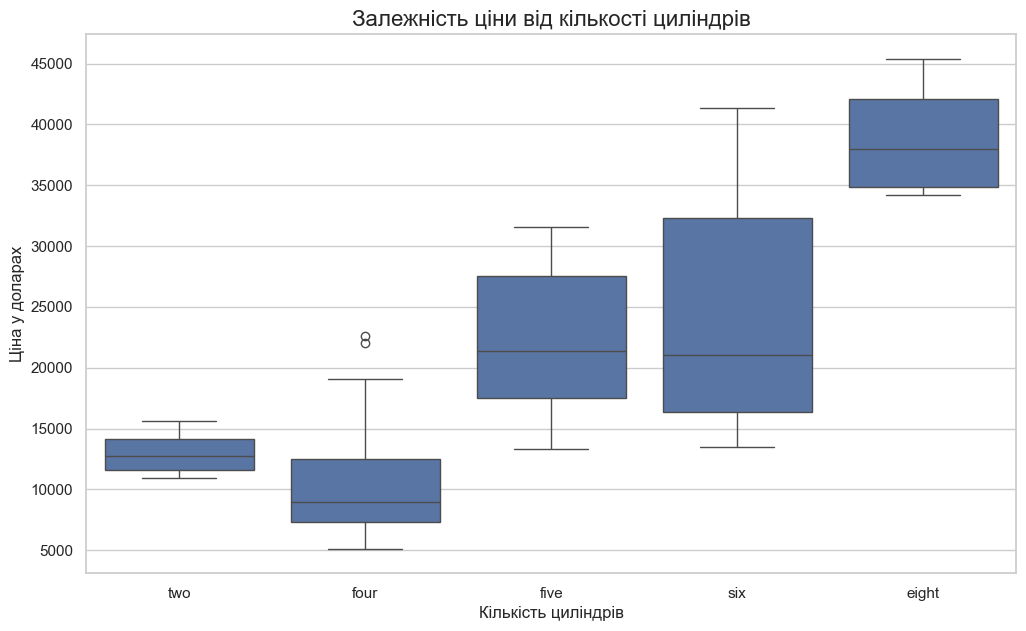

In [14]:
cylinder_order = ['two', 'four', 'five', 'six', 'eight']

plt.figure(figsize = (12, 7))
sns.boxplot(data = df_cleaned, x = 'num-of-cylinders', y = "price", order = cylinder_order)
plt.title('Залежність ціни від кількості циліндрів', fontsize = 16)
plt.xlabel('Кількість циліндрів')
plt.ylabel('Ціна у доларах')
plt.show()